<a href="https://colab.research.google.com/github/barauna-lo/Computational_Statistics/blob/main/HandsOn_08/CAP417_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 450 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# CAP-345-3 - Computational Statistics

* [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)

These code was provide for [this](https://github.com/vsantjr/CAP/blob/master/CAP417/Material/CAP-417_Estatistica%20Computacional_Prof%20Valdivino_A05.ipynb) class exercice. 




# Exercice 4 - Pratical

Consider the small image dataset presented [here](https://github.com/vsantjr/CAP/tree/master/CAP417/Images). In order to solve this exercise, you need to:

* Read/open the images. There are several ways to do it (in Python, in other programming languages);
* Select image features. Image features are important to represent each image. Select at least two of these features.


Develop a program in order to:

1. Present the components based on this dataset. Use Gaussian Mixture Models (GMMs) to solve this item;
2. Estimate the probability density function for each component you have found in the previous item. Show the plots. What is the best bandwidth in this case?
3. Estimate the probability density function for the entire dataset. Show the plot. What is the best bandwidth in this case?


Deadline: 12 may 2022


IMPORTANT: The last date to finish and send all the exercises is 12 may 2022.

## $\bullet$  Read/open the images 📥📦

In [ ]:
!wget 'https://github.com/vsantjr/CAP/blob/master/CAP417/Images/imgsmall.zip?raw=true'
#import zipfile 
!unzip "/content/imgsmall.zip?raw=true" -d "/content/image"

--2022-05-12 19:32:58--  https://github.com/vsantjr/CAP/blob/master/CAP417/Images/imgsmall.zip?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/vsantjr/CAP/raw/master/CAP417/Images/imgsmall.zip [following]
--2022-05-12 19:32:58--  https://github.com/vsantjr/CAP/raw/master/CAP417/Images/imgsmall.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vsantjr/CAP/master/CAP417/Images/imgsmall.zip [following]
--2022-05-12 19:32:58--  https://raw.githubusercontent.com/vsantjr/CAP/master/CAP417/Images/imgsmall.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request

In [ ]:
#Reading and allocating all figures names
from os import walk
f = []
for (dirpath, dirnames, filenames) in walk('/content/image'):
    f.extend(filenames)
    break
#https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory

I will use the same code used on [CAP 421 - Deep Leaning](https://github.com/barauna-lo/Deep-Learning/blob/main/AT1_CAP_421_Image_processing_basics_barauna_lo.ipynb) classes for read and print the image. For praticing we can use three librarys. But for all the exercice we will use only `openCv`

In [ ]:
#Import cv2 libary 
import cv2
#Reading all imagens on the 'image' folder
img = []
for i in range(len(f)):
  filename = '/content/image/'+f[i] #Alocating image name
  #Append a reshaped image readead for `imread` 
  img.append(cv2.resize(cv2.imread(filename), (100,100)))

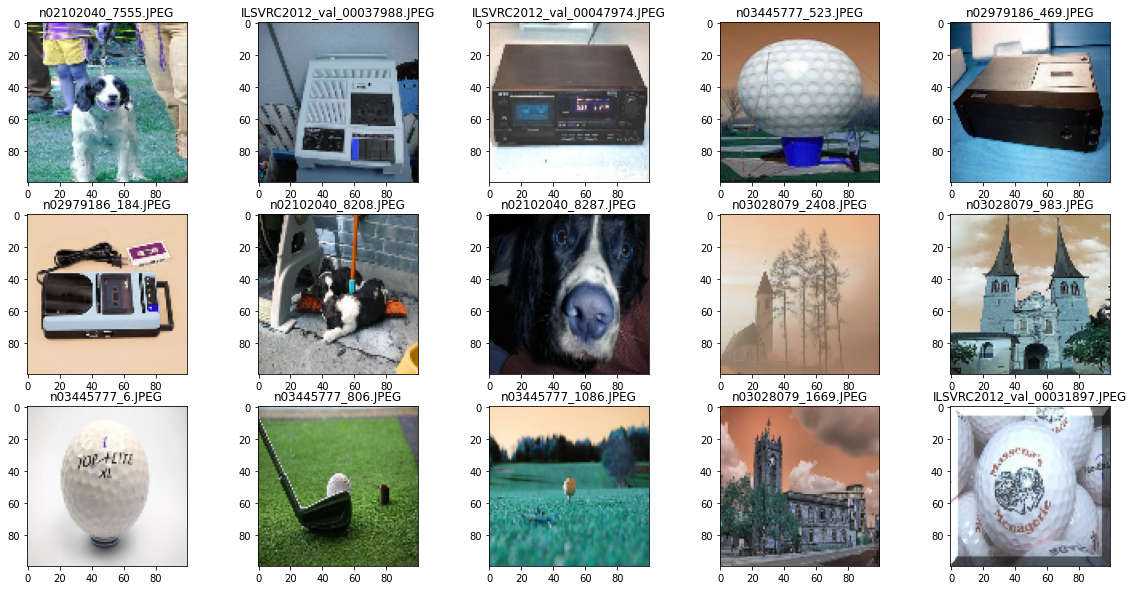

In [ ]:
#Lets take a look on the imagens
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

for i in range(0,15):
  plt.subplot(3,5,i+1)
  plt.imshow(img[i])#, cmap = 'gray')
  plt.title(f[i])
plt.show()

## $\bullet$ Select image features. 
Image features are important to represent each image. Select at least two of these features.

We will extract all colors features, gray scale and edges.

https://towardsdatascience.com/image-feature-extraction-traditional-and-deep-learning-techniques-ccc059195d04 

In [ ]:
import numpy as np
#Reading all imagens on the 'image' folder
img_red  = []
img_gree = []
img_feat = []
img_blue = []
img_gray = []
img_edges= []
for i in range(len(f)):
  #Taking Collors
  colors = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
  (R,G,B) = cv2.split(colors)
  img_red.append(R)
  img_gree.append(G)
  img_blue.append(B)
  #Gray Scale
  gray = cv2.cvtColor(img[i], cv2.COLOR_BGR2GRAY)
  img_gray.append(gray)
  # GaussianBlur to reduce the noise in the image
  blur = cv2.GaussianBlur(img_gray[i],(3,3), 0)
  # extract edges
  img_edges.append(cv2.Sobel(blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5))        

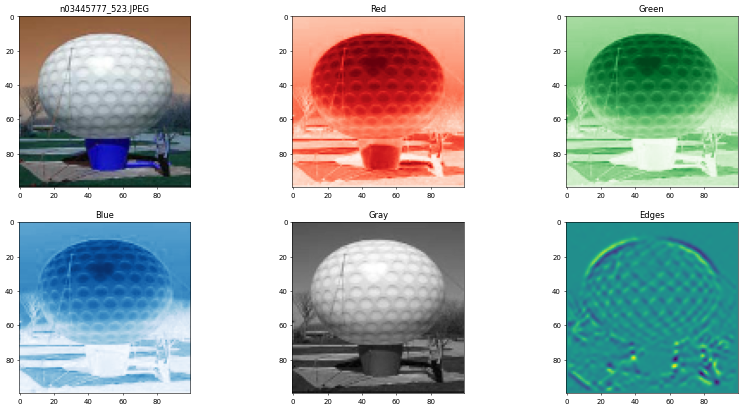

In [ ]:
plt.figure(figsize=(20,10),dpi=50)
i=3

plt.subplot(2,3,1)
plt.imshow(img[i])
plt.title(f[i])
plt.subplot(2,3,2)
plt.imshow(img_red[i], cmap = 'Reds')
plt.title('Red')
plt.subplot(2,3,3)
plt.imshow(img_gree[i], cmap = 'Greens')
plt.title('Green')
plt.subplot(2,3,4)
plt.imshow(img_blue[i], cmap = 'Blues')
plt.title('Blue')
plt.subplot(2,3,5)
plt.imshow(img_gray[i], cmap = 'gray')
plt.title('Gray')
plt.subplot(2,3,6)
plt.imshow(img_edges[i])#, cmap = 'Reds')
plt.title('Edges')


plt.show()

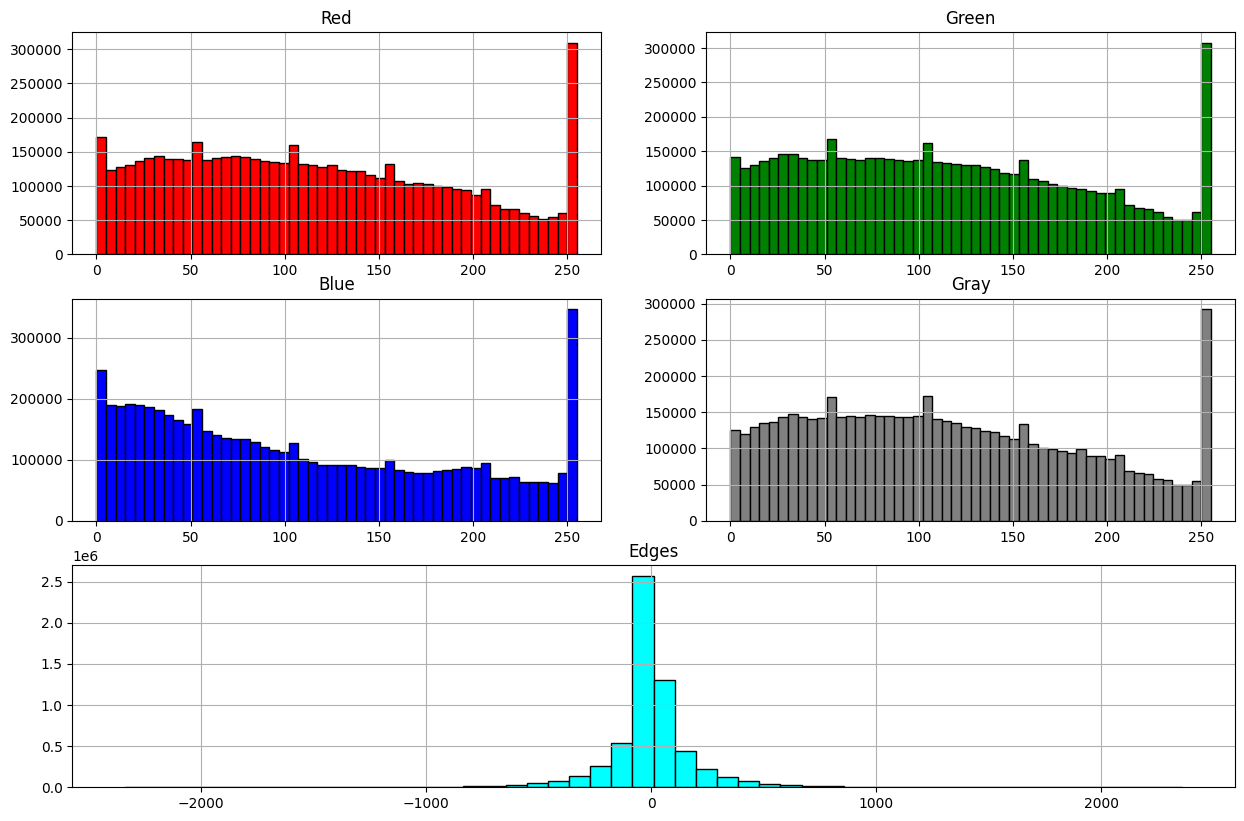

In [ ]:
plt.figure(figsize=(15,10),dpi=100)
plt.subplot(3,2,1)
plt.hist(np.reshape(img_red,(-3,1)),bins=50, edgecolor="k", label="Histogram",color='red')
plt.title('Red')
plt.grid()

plt.subplot(3,2,2)
plt.hist(np.reshape(img_gree,(-3,1)),bins=50, edgecolor="k", label="Histogram",color='green')
plt.title('Green')
plt.grid()

plt.subplot(3,2,3)
plt.hist(np.reshape(img_blue,(-3,1)),bins=50, edgecolor="k", label="Histogram",color='blue')
plt.title('Blue')
plt.grid()

plt.subplot(3,2,4)
plt.hist(np.reshape(img_gray,(-3,1)),bins=50, edgecolor="k", label="Histogram",color='gray')
plt.title('Gray')
plt.grid()

plt.subplot(3,2,(5,6))
plt.hist(np.reshape(img_edges,(-3,1)),bins=50, edgecolor="k", label="Histogram",color='cyan')
plt.title('Edges')
plt.grid()

plt.show()


We will use as `features` the red and gray colors

In [ ]:
feature = [img_red,img_gray]

## 1 - Present the components based on this dataset. 
Use Gaussian Mixture Models (GMMs) to solve this item;

In [ ]:
from sklearn import mixture
data = np.reshape(feature,(-1,2))
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(data)
label = gmm.predict(data)

#https://moonbooks.org/Articles/How-to-use-a-Gaussian-mixture-model-GMM-with-sklearn-in-python-/

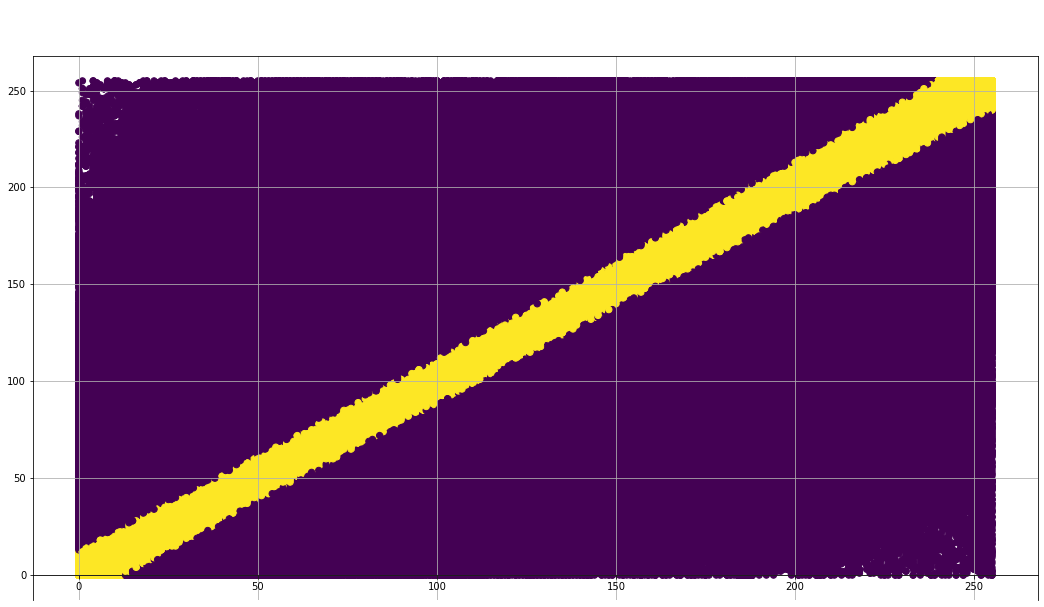

In [ ]:
#plot data distribuition
fig, axs = plt.subplots(figsize=(18, 10))

axs.scatter(data[:,1], data[:,0], c=label,s=40)
#axs.hist(image_feature_3)

#Create labels 
axs.set_xlabel('', size=14)
axs.set_ylabel('', size=14)
axs.spines['bottom'].set_position('zero')

# set title
plt.title(' ', pad=30, size=25)
plt.grid()
plt.show()

## 2 - Estimate the probability density function for each component you have found in the previous item. Show the plots. What is the best bandwidth in this case?

Now let's calculate the average value of each feature of each image and generate these Gaussian separations for this data. The data is already planned

In [ ]:
mean_red  = []
mean_gray = []
for i in range(len(img_red)):
  mean_red.append(np.mean(img_red[i]))
  mean_gray.append(np.mean(img_gray[i]))

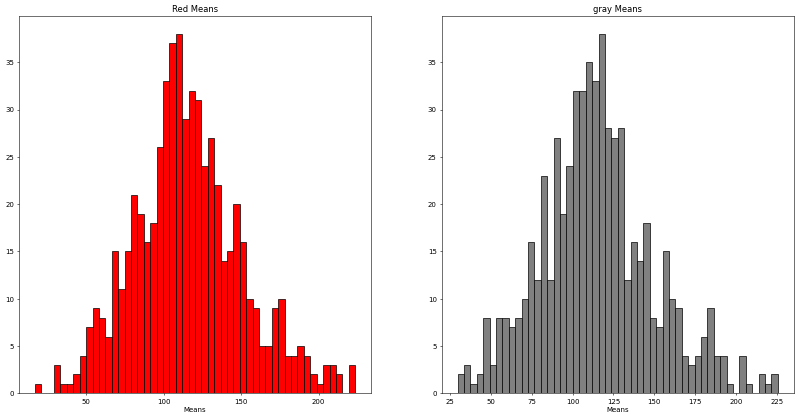

In [ ]:
plt.figure(figsize=(20,10),dpi=50)

plt.subplot(1,2,1)
plt.hist(mean_red,bins=50,color='red', edgecolor="k")
plt.title('Red Means')
plt.xlabel('Means')

plt.subplot(1,2,2)
plt.hist(mean_gray,bins=50,color='gray', edgecolor="k")
plt.title('gray Means')
plt.xlabel('Means')
plt.show()

In [ ]:
#All ready reshaped data
mean_feature = [mean_red,mean_gray]
mean_data    = np.reshape(mean_feature,(-1,2))
mean_gmm     = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(mean_data)
mean_label   = mean_gmm.predict(mean_data)


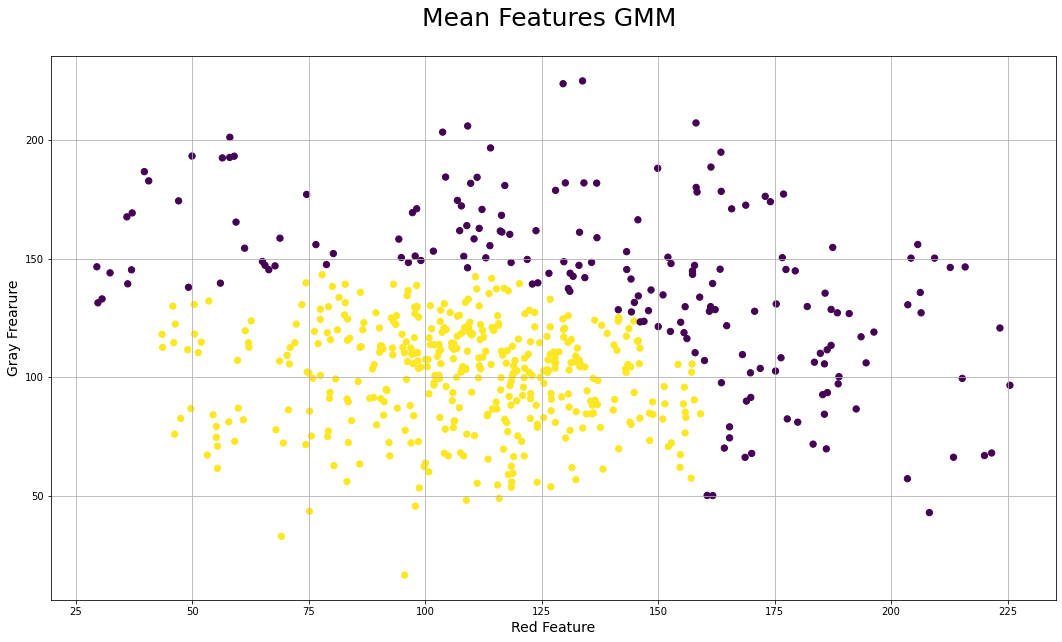

In [ ]:
#plot data distribuition
fig, axs = plt.subplots(figsize=(18, 10))
axs.scatter(mean_data[:,0], mean_data[:,1], c=mean_label,s=40)
#axs.hist(image_feature_3)

#Create labels 
axs.set_xlabel('Red Feature', size=14)
axs.set_ylabel('Gray Frearure', size=14)
#axs.spines['bottom'].set_position('zero')

# set title
plt.title('Mean Features GMM ', pad=30, size=25)
plt.grid()
plt.show()

## 3 - Present the components based on this dataset. 
Use Gaussian Mixture Models (GMMs) to solve this item;

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


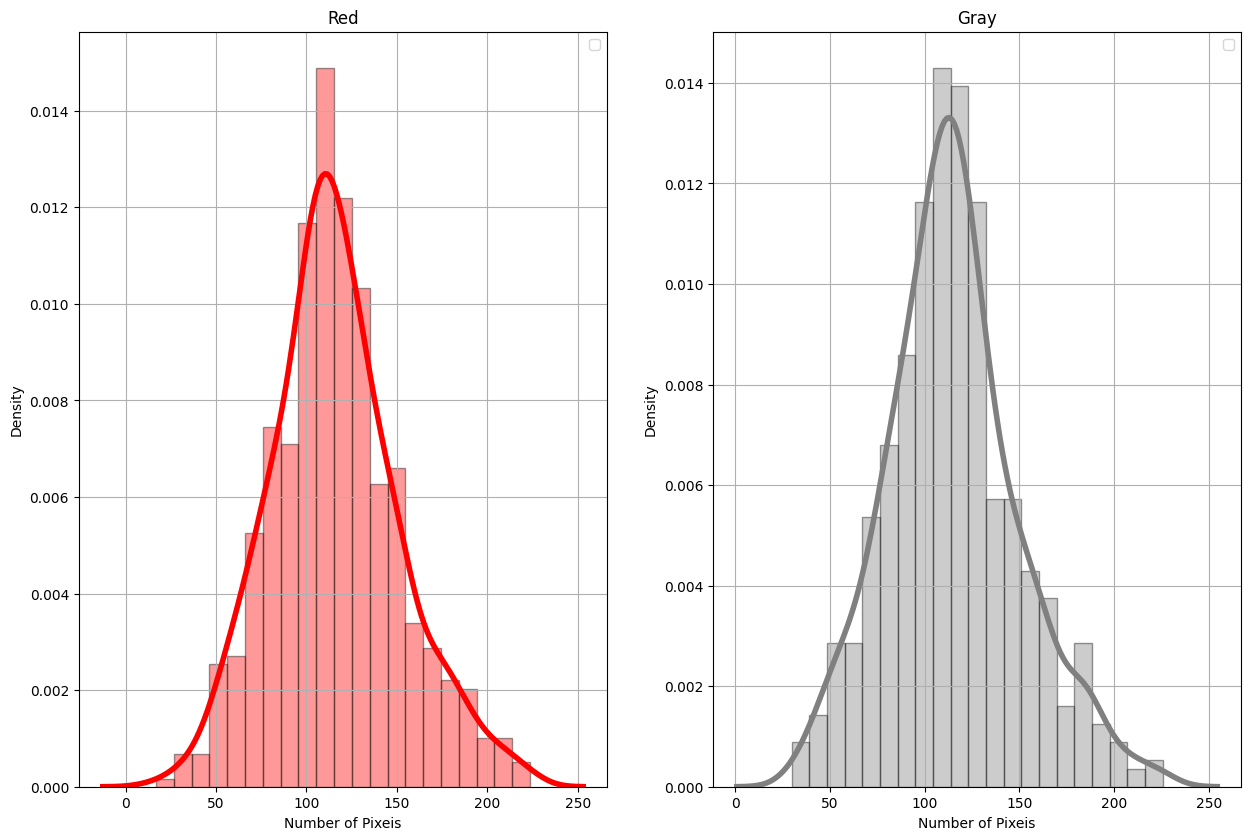

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10),dpi=100)

plt.subplot(1,2,1)
sns.distplot(mean_red, hist=True, kde=True, 
             color = 'Red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlabel('Number of Pixeis')
plt.ylabel('Density')
plt.title('Red')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
sns.distplot(mean_gray, hist=True, kde=True, 
             color = 'Gray', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlabel('Number of Pixeis')
plt.ylabel('Density')
plt.title('Gray')
plt.legend()
plt.grid()



In [ ]:
import statsmodels.api as sm
kde_cluster_0 = sm.nonparametric.KDEUnivariate(mean_red)
kde_cluster_0.fit()

kde_cluster_1 = sm.nonparametric.KDEUnivariate(mean_gray)
kde_cluster_1.fit()

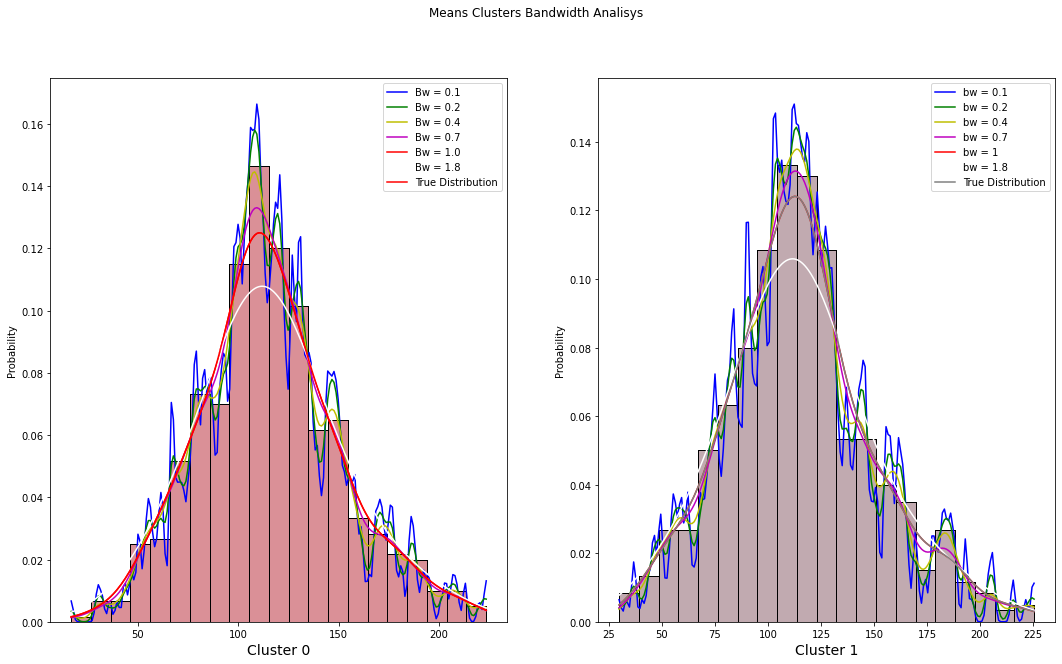

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Means Clusters Bandwidth Analisys')

my_colors = ['b','g','y','m','r','w']
bandwidth = [0.1, 0.2, 0.4, 0.7, 1, 1.8]

for i in range(len(bandwidth)):
    sns.histplot(mean_red, ax=axs[0],stat='probability', kde=True, kde_kws={'bw_adjust':bandwidth[i]}, color=my_colors[i], alpha=0.1, legend=True)
sns.histplot(mean_red, ax=axs[0], stat='probability', kde=True, color='red', alpha=0.2, legend=True)
plt.legend(labels=["bw = 0.1","bw = 0.2", "bw = 0.4", "bw = 0.7","bw = 1","bw = 1.8", "True Distribution"])
axs[0].set_xlabel("Cluster 0", size=14)
axs[0].legend(labels=["Bw = 0.1",
                      "Bw = 0.2", 
                      "Bw = 0.4", 
                      "Bw = 0.7",
                      "Bw = 1.0",
                      "Bw = 1.8",
                      "True Distribution"])

for i in range(len(bandwidth)):
    sns.histplot(mean_gray, ax=axs[1],stat='probability', kde=True, kde_kws={'bw_adjust':bandwidth[i]}, color=my_colors[i], alpha=0.1, legend=True)
sns.histplot(mean_gray, ax=axs[1], stat='probability', kde=True, color='gray', alpha=0.2, legend=True)
plt.legend(labels=["Bw = 0.1",
                   "Bw = 0.2", 
                   "Bw = 0.4", 
                   "Bw = 0.7",
                   "Bw = 1.0",
                   "Bw = 1.8", 
                   "True Distribution"])
axs[1].set_xlabel("Cluster 1", size=14)
axs[1].legend(labels=["bw = 0.1","bw = 0.2", "bw = 0.4", "bw = 0.7","bw = 1","bw = 1.8", "True Distribution"])

# set title
plt.title('', pad=30, size=25)
plt.show()

## 3.1 Plot for the intire image features

In [ ]:
#new_gray = list(new_gray[:,0])
np.shape(new_red)

(6000000,)

In [ ]:
type(new_red)

list

In [ ]:
new_red = np.reshape(img_red,(-1,1))
new_red = list(new_red[:,0].astype('double'))
new_gray = np.reshape(img_gray,(-1,1))
new_gray = list(new_gray[:,0].astype('double'))
#Special Thanks for Ellen Tuanne for help-me in this error


In [ ]:
import statsmodels.api as sm

kde_cluster_0 = sm.nonparametric.KDEUnivariate(new_red)
kde_cluster_0.fit()

kde_cluster_1 = sm.nonparametric.KDEUnivariate(new_gray)
kde_cluster_1.fit()


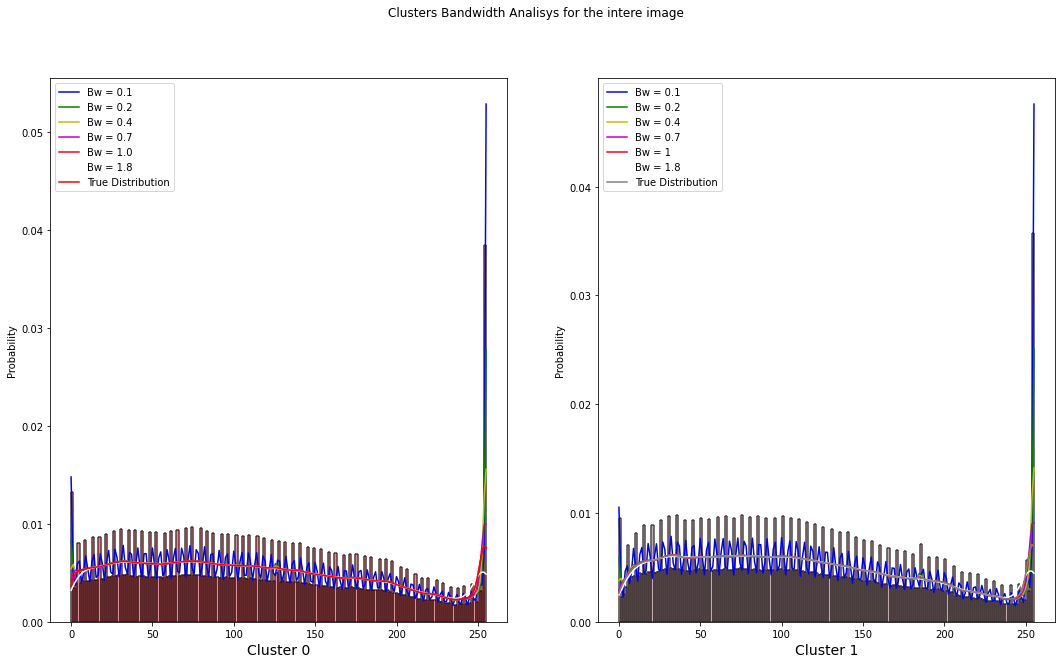

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Clusters Bandwidth Analisys for the intere image')

my_colors = ['b','g','y','m','r','w']
bandwidth = [0.1, 0.2, 0.4, 0.7, 1, 1.8]

for i in range(len(bandwidth)):
    sns.histplot(new_red, ax=axs[0],stat='probability', kde=True, kde_kws={'bw_adjust':bandwidth[i]}, color=my_colors[i], alpha=0.1, legend=True)
sns.histplot(new_red, ax=axs[0], stat='probability', kde=True, color='red', alpha=0.2, legend=True)
plt.legend(labels=["Bw = 0.1","Bw = 0.2", "Bw = 0.4", "Bw = 0.7","Bw = 1","Bw = 1.8", "True Distribution"])
axs[0].set_xlabel("Cluster 0", size=14)
axs[0].legend(labels=["Bw = 0.1",
                      "Bw = 0.2", 
                      "Bw = 0.4", 
                      "Bw = 0.7",
                      "Bw = 1.0",
                      "Bw = 1.8",
                      "True Distribution"])

for i in range(len(bandwidth)):
    sns.histplot(new_gray, ax=axs[1],stat='probability', kde=True, kde_kws={'bw_adjust':bandwidth[i]}, color=my_colors[i], alpha=0.1, legend=True)
sns.histplot(new_gray, ax=axs[1], stat='probability', kde=True, color='gray', alpha=0.2, legend=True)
plt.legend(labels=["Bw = 0.1",
                   "Bw = 0.2", 
                   "Bw = 0.4", 
                   "Bw = 0.7",
                   "Bw = 1.0",
                   "Bw = 1.8", 
                   "True Distribution"])
axs[1].set_xlabel("Cluster 1", size=14)
axs[1].legend(labels=["Bw = 0.1","Bw = 0.2", "Bw = 0.4", "Bw = 0.7","Bw = 1","Bw = 1.8", "True Distribution"])

# set title
plt.title('', pad=30, size=25)
plt.show()

# References

* [How do I list all files of a directory?](https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory)
* [Image Feature Extraction: Traditional and Deep Learning Techniques](https://towardsdatascience.com/image-feature-extraction-traditional-and-deep-learning-techniques-ccc059195d04)